In [6]:
# BASICS
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_resample as ms
import my_functions as mf

# METRICS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# GRID SEARCHING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Master Dictionary

In [7]:
# emperor dictionary
ed = {}

# Read Data

In [8]:
data_file_path = "/Users/gandalf/Documents/coding/do_not_commit/capstone/"

X_train = np.load(data_file_path+'X_train.npy')
X_test = np.load(data_file_path+'X_test.npy')
y_train = np.load(data_file_path+'y_train.npy')
y_test = np.load(data_file_path+'y_test.npy')
cols = np.load(data_file_path+'cols.npy')

In [9]:
ada_boost_grid = {
#     n_estimators : integer, optional (default=50)
#     learning_rate : float, optional (default=1.)
    "learning_rate": np.arange(.1, 2, .1),      # 1
    "n_estimators": np.arange(1, 100, 10)       # 50
}

In [11]:
def gridsearching(model, param, grid):
    
    search = GridSearchCV(model, param_grid=grid, scoring='f1')    
    search.fit(X_train, y_train, sample_weight = {0: 0.10000000000000001, 1: 0.90000000000000002})

    df = pd.DataFrame(search.cv_results_)
    df = df.drop(['params'], axis=1)
    
    return df

def plot_line(df, param):
    plt.plot(df.iloc[:,4], df.mean_train_score)
    plt.plot(df.iloc[:,4], df.mean_test_score)

    plt.xlabel(param)
    plt.ylabel("f1 score")
    
    plt.show()
    
def plot_bar(df, param, w=1, rotate=False):
    plt.bar(df.iloc[:,4], df.mean_train_score, width=w, yerr=df.std_train_score)
    plt.bar(df.iloc[:,4], df.mean_test_score, width=w, yerr=df.std_train_score)

    plt.xlabel(param)
    plt.ylabel("f1 score")
    if rotate: 
        plt.xticks(rotation=70)

    plt.show()

# learning_rate

In [11]:
parameter = "learning_rate"
values = np.arange(.1, 2, .1)

In [8]:
%%time

ed[parameter] = gridsearching(
        GradientBoostingClassifier(),         # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

CPU times: user 2min 12s, sys: 1.27 s, total: 2min 13s
Wall time: 2min 17s


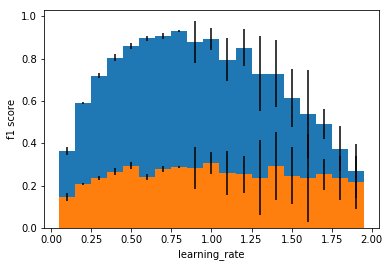

In [12]:
# Plot
plot_bar(ed[parameter], parameter, .1) 

In [15]:
ed[parameter]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.422314,0.011214,0.146207,0.362723,0.1,19,0.130584,0.375385,0.171053,0.337008,0.136986,0.375776,0.169889,0.007164,0.017762,0.018184
1,2.539409,0.006672,0.207325,0.591821,0.2,18,0.203704,0.596817,0.219512,0.593085,0.198758,0.585561,0.248769,0.000292,0.008851,0.004681
2,2.298732,0.006094,0.235200,0.719635,0.3,16,0.209632,0.725090,0.269231,0.727932,0.226744,0.705882,0.155154,0.000301,0.025057,0.009793
3,2.193621,0.006906,0.265179,0.803778,0.4,7,0.244032,0.819890,0.301508,0.811236,0.250000,0.780207,0.049699,0.000787,0.025803,0.017037
4,2.132838,0.006006,0.294245,0.860090,0.5,2,0.250000,0.838992,0.297767,0.870968,0.335000,0.870311,0.106192,0.000483,0.034790,0.014921
5,2.265317,0.006279,0.239892,0.894678,0.6,12,0.253659,0.911917,0.260870,0.891693,0.205128,0.880423,0.218574,0.000406,0.024750,0.013029
6,2.605456,0.006268,0.278577,0.906236,0.7,6,0.277647,0.908903,0.295943,0.919753,0.262136,0.890052,0.129497,0.000516,0.013816,0.012271
7,2.759184,0.006010,0.286905,0.931163,0.8,4,0.278027,0.925738,0.296296,0.931452,0.286396,0.936299,0.134244,0.000222,0.007468,0.004317
8,2.062317,0.005697,0.283357,0.877901,0.9,5,0.281250,0.935194,0.300683,0.737084,0.268132,0.961424,0.248672,0.000137,0.013371,0.100147
9,2.268233,0.005904,0.305596,0.891768,1,1,0.296629,0.886364,0.316742,0.831557,0.303419,0.957384,0.081632,0.000208,0.008355,0.051511


# n_estimators

In [16]:
parameter = "n_estimators"
values = np.arange(1, 100, 10)

In [17]:
%%time

ed[parameter] = gridsearching(
        GradientBoostingClassifier(),         # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

CPU times: user 38 s, sys: 365 ms, total: 38.3 s
Wall time: 40 s


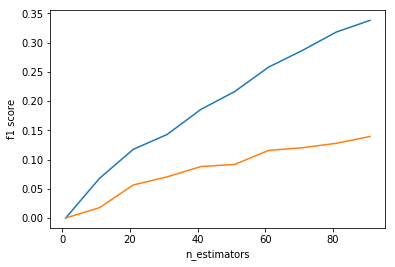

In [32]:
# Plot
plot_line(ed[parameter], parameter) 

# Both

In [12]:
%%time 

grid = {
    "learning_rate": np.arange(.1, 2, .2),    # 1
    "n_estimators": np.arange(1, 100, 20)     # 50
}

model = AdaBoostClassifier()
search = GridSearchCV(model, param_grid=grid, scoring='f1')    
search.fit(X_train, y_train)

df = pd.DataFrame(search.cv_results_)

CPU times: user 1min 41s, sys: 1.21 s, total: 1min 42s
Wall time: 1min 44s


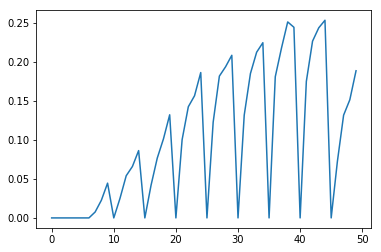

In [13]:
plt.plot(df.mean_test_score)
plt.show()

In [40]:
%%time 

grid = {
    "learning_rate": np.arange(.1, 2, .1),    # 1
    "n_estimators": np.arange(1, 100, 10)     # 50
}

model = AdaBoostClassifier()
search = GridSearchCV(model, param_grid=grid, scoring='f1')    
search.fit(X_train, y_train)

df = pd.DataFrame(search.cv_results_)

CPU times: user 7min 45s, sys: 5.08 s, total: 7min 50s
Wall time: 8min 9s


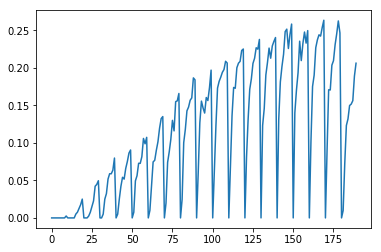

In [41]:
plt.plot(df.mean_test_score)
plt.show()

In [42]:
# Predict
y_pred_ab = search.predict(X_test)
y_pp_ab = search.predict_proba(X_test)

In [44]:
print("\nMETRICS")
print("Model recall: {}".format(recall_score(y_test, y_pred_ab)))
print("Model precision: {}".format(precision_score(y_test, y_pred_ab)))
print("Model f1: {}".format(f1_score(y_test, y_pred_ab)))
print("Model accuracy: {}".format(search.score(X_test, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred_ab))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.18461538461538463
Model precision: 0.40336134453781514
Model f1: 0.25329815303430075
Model accuracy: 0.25329815303430075

CONFUSION MATRIX
[[2228   71]
 [ 212   48]]

key:
 TN   FP 
 FN   TP 


In [47]:
search.best_params_

{'learning_rate': 1.7000000000000002, 'n_estimators': 91}

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [49]:
df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.030787,0.005153,0.0,0.0,0.1,1,"{'learning_rate': 0.1, 'n_estimators': 1}",157,0.0,0.0,0.0,0.0,0.0,0.0,0.009784,0.002240,0.0,0.0
1,0.155574,0.007461,0.0,0.0,0.1,11,"{'learning_rate': 0.1, 'n_estimators': 11}",157,0.0,0.0,0.0,0.0,0.0,0.0,0.003141,0.000870,0.0,0.0
2,0.283194,0.012332,0.0,0.0,0.1,21,"{'learning_rate': 0.1, 'n_estimators': 21}",157,0.0,0.0,0.0,0.0,0.0,0.0,0.008033,0.001103,0.0,0.0
3,0.427161,0.017212,0.0,0.0,0.1,31,"{'learning_rate': 0.1, 'n_estimators': 31}",157,0.0,0.0,0.0,0.0,0.0,0.0,0.014821,0.000859,0.0,0.0
4,0.659083,0.024375,0.0,0.0,0.1,41,"{'learning_rate': 0.1, 'n_estimators': 41}",157,0.0,0.0,0.0,0.0,0.0,0.0,0.073695,0.000849,0.0,0.0


In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

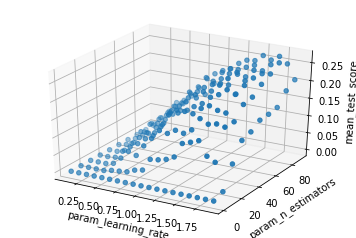

In [68]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter( df.param_learning_rate, df.param_n_estimators,df.mean_test_score,)
threedee.set_xlabel("param_learning_rate")
threedee.set_ylabel("param_n_estimators")
threedee.set_zlabel("mean_test_score")
plt.show()